SECTION 1: Upload and Train on Data

Alternatively, using pre-analyzed data...

Initializing the Learning Technique Recommender model...

Available course types:
- Applied Calculation-Driven Learning
- Deep Conceptual Learning
- Case-Based & Strategic Learning
- Language & Communication-Based Learning
- Hands-On, Project-Based Learning

SECTION 2: Making Predictions

Predictions for each course type:
Applied Calculation-Driven Learning: Worked Example Analysis (Expected grade: 93.5%)
Deep Conceptual Learning: Conceptual Mapping (Expected grade: 93.2%)
Case-Based & Strategic Learning: Case Study Analysis (Expected grade: 94.0%)
Language & Communication-Based Learning: Immersive Practice (Expected grade: 93.1%)
Hands-On, Project-Based Learning: Incremental Skill Building (Expected grade: 93.7%)

SECTION 3: Visualizations

Creating visualizations for all course types...
(Visualizations will appear below)


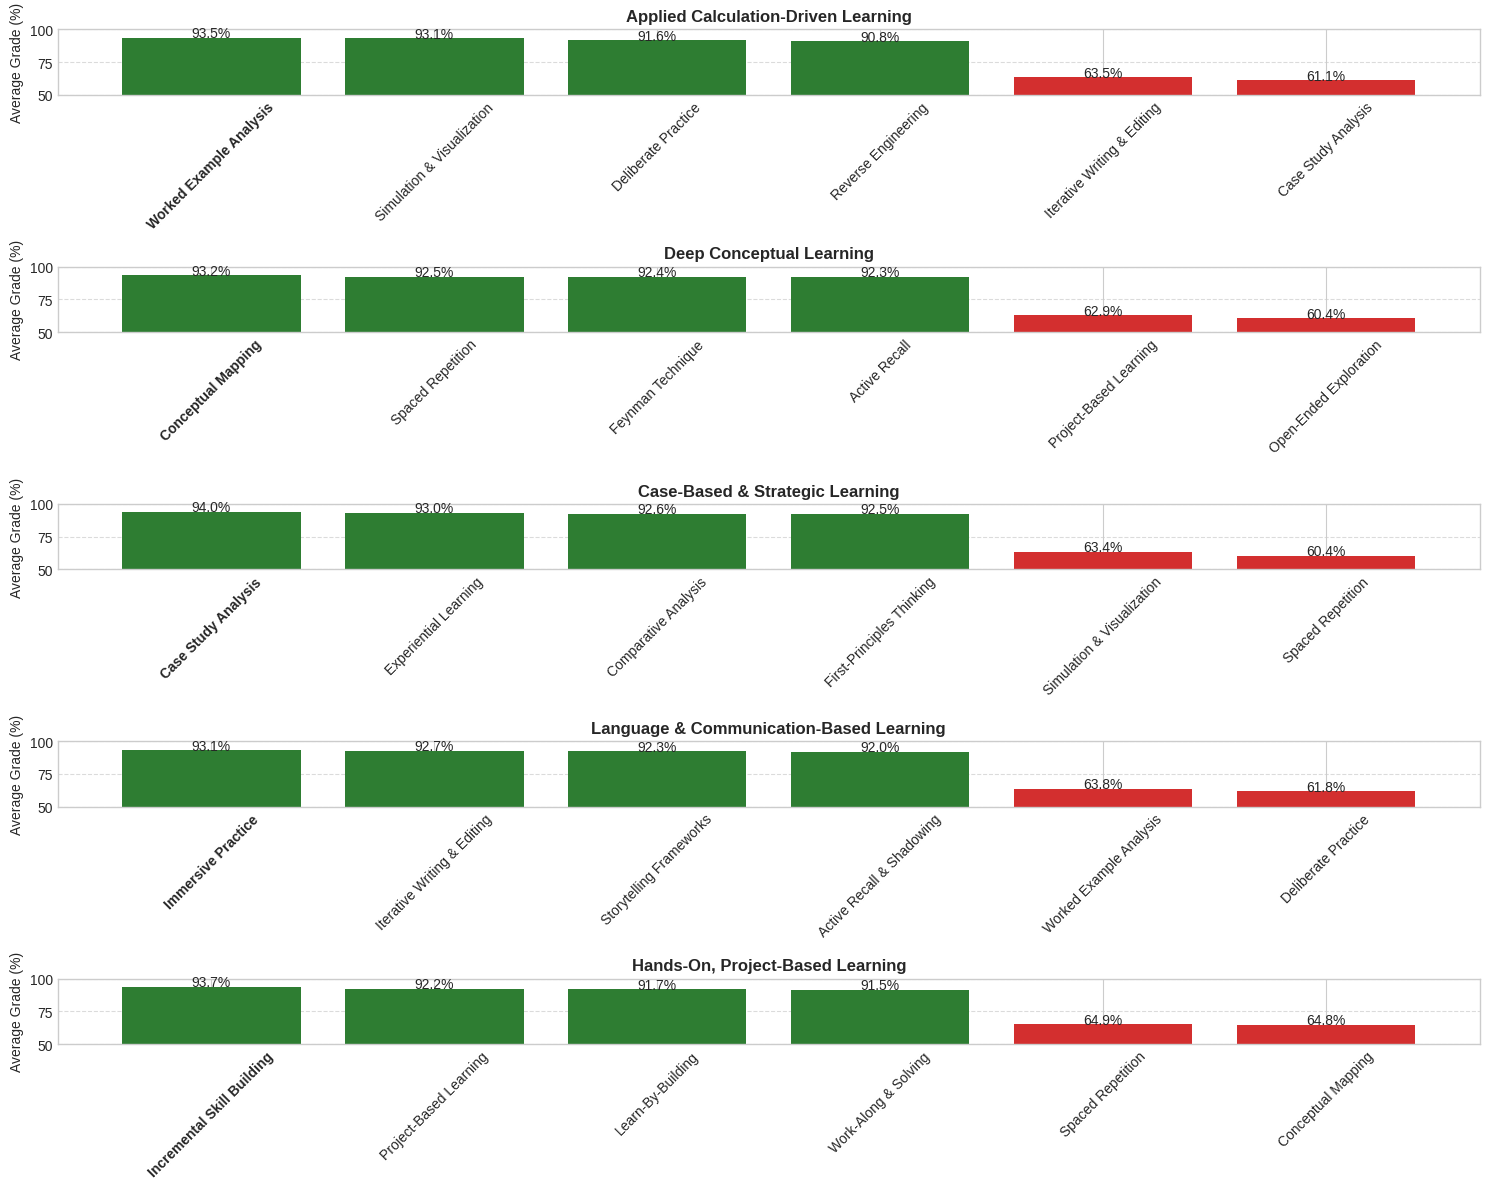


SECTION 4: Sample Application - Learning Technique Recommender

To run the interactive demo, uncomment the line:
# course_type_recommender_demo()

SECTION 5: Exporting and Importing the Model
You can export the model to use in your application:

To export the model, uncomment the line:
# export_model_demo()

SECTION 6: Integration with Other Systems
Here's example code showing how to integrate this model with a syllabus analyzer:

# Example integration code (for future implementation)

def integrate_with_syllabus_analyzer(syllabus_text, model):
    # 1. Extract course type from syllabus (this would be your NLP component)
    course_type = analyze_syllabus(syllabus_text)
    
    # 2. Get learning technique recommendation
    recommendation = model.predict_with_confidence(course_type)
    
    # 3. Return results
    return {
        "detected_course_type": course_type,
        "recommended_technique": recommendation["technique"],
        "expected_grade": recommendation["expected_grad

In [ ]:
# Learning Technique Recommender - Colab Notebook
# Copy and paste this entire notebook into Google Colab

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Dict, Union, Tuple, List, Optional
from google.colab import files
import io

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

class LearningTechniqueRecommender:
    """
    A model that recommends the most effective learning technique for a given course type.

    The model is trained on historical data to identify which learning techniques
    result in the highest grades for different course types.
    """

    def __init__(self):
        """Initialize the recommender with the pre-analyzed best techniques."""
        # Dictionary mapping course types to best learning techniques (based on analysis)
        self.best_techniques = {
            "Applied Calculation-Driven Learning": "Worked Example Analysis",
            "Deep Conceptual Learning": "Conceptual Mapping",
            "Case-Based & Strategic Learning": "Case Study Analysis",
            "Language & Communication-Based Learning": "Immersive Practice",
            "Hands-On, Project-Based Learning": "Incremental Skill Building"
        }

        # Additional information about each recommendation (average grades)
        self.technique_grades = {
            "Applied Calculation-Driven Learning": {
                "Worked Example Analysis": 93.45,
                "Simulation & Visualization": 93.06,
                "Deliberate Practice": 91.63,
                "Reverse Engineering": 90.80,
                "Iterative Writing & Editing": 63.45,
                "Case Study Analysis": 61.15
            },
            "Deep Conceptual Learning": {
                "Conceptual Mapping": 93.25,
                "Spaced Repetition": 92.46,
                "Feynman Technique": 92.42,
                "Active Recall": 92.33,
                "Project-Based Learning": 62.93,
                "Open-Ended Exploration": 60.41
            },
            "Case-Based & Strategic Learning": {
                "Case Study Analysis": 93.97,
                "Experiential Learning": 92.98,
                "Comparative Analysis": 92.60,
                "First-Principles Thinking": 92.50,
                "Simulation & Visualization": 63.42,
                "Spaced Repetition": 60.42
            },
            "Language & Communication-Based Learning": {
                "Immersive Practice": 93.14,
                "Iterative Writing & Editing": 92.70,
                "Storytelling Frameworks": 92.27,
                "Active Recall & Shadowing": 92.03,
                "Worked Example Analysis": 63.76,
                "Deliberate Practice": 61.82
            },
            "Hands-On, Project-Based Learning": {
                "Incremental Skill Building": 93.67,
                "Project-Based Learning": 92.23,
                "Learn-By-Building": 91.65,
                "Work-Along & Solving": 91.50,
                "Spaced Repetition": 64.94,
                "Conceptual Mapping": 64.78
            }
        }

        # List of all available course types
        self.available_course_types = list(self.best_techniques.keys())

        # List of all learning techniques
        self.all_learning_techniques = sorted(list({
            technique
            for techniques in self.technique_grades.values()
            for technique in techniques.keys()
        }))

    def predict(self, course_type: str) -> str:
        """
        Predict the most effective learning technique for a given course type.

        Args:
            course_type: The type of course (must match one of the known types)

        Returns:
            The recommended learning technique

        Raises:
            ValueError: If the course type is not recognized
        """
        if course_type not in self.best_techniques:
            raise ValueError(
                f"Unknown course type: {course_type}. "
                f"Available types: {', '.join(self.available_course_types)}"
            )

        return self.best_techniques[course_type]

    def predict_with_confidence(self, course_type: str) -> Dict[str, Union[str, float]]:
        """
        Predict the most effective learning technique with confidence score.

        Args:
            course_type: The type of course

        Returns:
            Dictionary with technique and expected grade

        Raises:
            ValueError: If the course type is not recognized
        """
        technique = self.predict(course_type)
        expected_grade = self.technique_grades[course_type][technique]

        return {
            "technique": technique,
            "expected_grade": expected_grade
        }

    def get_all_techniques_ranked(self, course_type: str) -> List[Dict[str, Union[str, float]]]:
        """
        Get all learning techniques ranked by effectiveness for a course type.

        Args:
            course_type: The type of course

        Returns:
            List of dictionaries with techniques and expected grades, sorted by grade

        Raises:
            ValueError: If the course type is not recognized
        """
        if course_type not in self.technique_grades:
            raise ValueError(
                f"Unknown course type: {course_type}. "
                f"Available types: {', '.join(self.available_course_types)}"
            )

        techniques = self.technique_grades[course_type]
        ranked_techniques = [
            {"technique": technique, "expected_grade": grade}
            for technique, grade in techniques.items()
        ]

        return sorted(ranked_techniques, key=lambda x: x["expected_grade"], reverse=True)

    def train(self, data: pd.DataFrame) -> None:
        """
        Train the model on new data.

        Args:
            data: DataFrame with columns 'Course Type', 'Learning Technique', and 'Grade of Module (%)'
        """
        # Ensure required columns exist
        required_columns = ['Course Type', 'Learning Technique', 'Grade of Module (%)']
        if not all(col in data.columns for col in required_columns):
            raise ValueError(f"Data must contain all required columns: {required_columns}")

        # Reset the model's recommendations
        self.best_techniques = {}
        self.technique_grades = {}

        # Group by course type and learning technique, calculate average grades
        for course_type in data['Course Type'].unique():
            course_data = data[data['Course Type'] == course_type]
            technique_grades = {}

            for technique in course_data['Learning Technique'].unique():
                technique_data = course_data[course_data['Learning Technique'] == technique]
                avg_grade = technique_data['Grade of Module (%)'].mean()
                technique_grades[technique] = round(avg_grade, 2)

            # Find the best technique
            best_technique = max(technique_grades.items(), key=lambda x: x[1])[0]

            # Update the model
            self.best_techniques[course_type] = best_technique
            self.technique_grades[course_type] = technique_grades

        # Update available course types
        self.available_course_types = list(self.best_techniques.keys())

        # Update all learning techniques
        self.all_learning_techniques = sorted(list({
            technique
            for techniques in self.technique_grades.values()
            for technique in techniques.keys()
        }))

    def get_available_course_types(self) -> List[str]:
        """Get a list of all available course types."""
        return self.available_course_types

    def get_all_learning_techniques(self) -> List[str]:
        """Get a list of all learning techniques in the dataset."""
        return self.all_learning_techniques

    def visualize_all_course_types(self, figsize=(15, 12)):
        """
        Create a visualization showing the effectiveness of learning techniques
        for all course types.

        Args:
            figsize: Size of the figure (width, height) in inches
        """
        n_course_types = len(self.available_course_types)
        fig, axes = plt.subplots(n_course_types, 1, figsize=figsize)

        if n_course_types == 1:
            axes = [axes]

        for i, course_type in enumerate(self.available_course_types):
            ax = axes[i]
            ranked_techniques = self.get_all_techniques_ranked(course_type)

            techniques = [item['technique'] for item in ranked_techniques]
            grades = [item['expected_grade'] for item in ranked_techniques]

            # Create bar colors based on grade effectiveness
            colors = ['#2E7D32' if grade > 90 else
                     '#1976D2' if grade > 80 else
                     '#FFA000' if grade > 70 else
                     '#D32F2F' for grade in grades]

            ax.bar(techniques, grades, color=colors)
            ax.set_title(f"{course_type}", fontsize=12, fontweight='bold')
            ax.set_ylabel("Average Grade (%)")
            ax.set_ylim(50, 100)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.tick_params(axis='x', rotation=45)

            # Add grade annotations
            for j, grade in enumerate(grades):
                ax.text(j, grade + 0.5, f"{grade:.1f}%", ha='center')

            # Highlight the best technique
            best_idx = 0  # First item since they're ranked
            ax.get_xticklabels()[best_idx].set_fontweight('bold')

        plt.tight_layout()
        plt.show()
        return fig

    def visualize_course_type(self, course_type, figsize=(10, 6)):
        """
        Create a visualization showing the effectiveness of learning techniques
        for a specific course type.

        Args:
            course_type: The course type to visualize
            figsize: Size of the figure (width, height) in inches
        """
        if course_type not in self.available_course_types:
            raise ValueError(f"Unknown course type: {course_type}")

        ranked_techniques = self.get_all_techniques_ranked(course_type)

        techniques = [item['technique'] for item in ranked_techniques]
        grades = [item['expected_grade'] for item in ranked_techniques]

        # Create bar colors based on grade effectiveness
        colors = ['#2E7D32' if grade > 90 else
                 '#1976D2' if grade > 80 else
                 '#FFA000' if grade > 70 else
                 '#D32F2F' for grade in grades]

        fig, ax = plt.subplots(figsize=figsize)
        bars = ax.bar(techniques, grades, color=colors)
        ax.set_title(f"Learning Technique Effectiveness for {course_type}", fontsize=14, fontweight='bold')
        ax.set_ylabel("Average Grade (%)")
        ax.set_ylim(50, 100)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='x', rotation=45)

        # Add grade annotations
        for i, grade in enumerate(grades):
            ax.text(i, grade + 0.5, f"{grade:.1f}%", ha='center')

        plt.tight_layout()
        plt.show()
        return fig

# Demo Section 1: Upload and Train on CSV Data
print("=" * 80)
print("SECTION 1: Upload and Train on Data")
print("=" * 80)

def upload_and_process_data():
    print("Please upload your CSV file...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Read the data
        content = uploaded[filename]
        data = pd.read_csv(io.BytesIO(content))

        print(f"\nUploaded: {filename}")
        print(f"Data shape: {data.shape}")

        # Display column names and first few rows
        print("\nColumn names:")
        print(", ".join(data.columns))

        print("\nFirst 5 rows:")
        print(data.head())

        return data

    return None

# Uncomment the following line to upload data
# data = upload_and_process_data()

# Alternative: Load embedded example data (pre-processed from your analysis)
print("\nAlternatively, using pre-analyzed data...")

# Create sample data based on the analysis results
course_types = [
    "Applied Calculation-Driven Learning",
    "Deep Conceptual Learning",
    "Case-Based & Strategic Learning",
    "Language & Communication-Based Learning",
    "Hands-On, Project-Based Learning"
]

# Create the model
print("\nInitializing the Learning Technique Recommender model...")
model = LearningTechniqueRecommender()

# Print all available course types
print("\nAvailable course types:")
for course_type in model.get_available_course_types():
    print(f"- {course_type}")

# Demo Section 2: Making Predictions
print("\n" + "=" * 80)
print("SECTION 2: Making Predictions")
print("=" * 80)

# Demo prediction for each course type
print("\nPredictions for each course type:")
for course_type in model.get_available_course_types():
    result = model.predict_with_confidence(course_type)
    print(f"{course_type}: {result['technique']} (Expected grade: {result['expected_grade']:.1f}%)")

# Demo Section 3: Visualizations
print("\n" + "=" * 80)
print("SECTION 3: Visualizations")
print("=" * 80)

print("\nCreating visualizations for all course types...")
print("(Visualizations will appear below)")

# Interactive demo code for visualizing a specific course type
def visualize_specific_course_type():
    # Create dropdown widget for selecting course type
    from ipywidgets import widgets
    from IPython.display import display

    course_types = model.get_available_course_types()

    dropdown = widgets.Dropdown(
        options=course_types,
        value=course_types[0],
        description='Course Type:',
        style={'description_width': 'initial'},
        layout={'width': '50%'}
    )

    def on_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            print(f"\nVisualizing techniques for: {change['new']}")
            model.visualize_course_type(change['new'])

            # Print ranked techniques
            print("\nRanked learning techniques:")
            ranked_techniques = model.get_all_techniques_ranked(change['new'])
            for i, technique in enumerate(ranked_techniques, 1):
                print(f"{i}. {technique['technique']} - {technique['expected_grade']:.1f}%")

    dropdown.observe(on_change)
    display(dropdown)
    print("Select a course type from the dropdown to visualize its learning techniques.")

# Uncomment to use interactive visualization in Colab
# visualize_specific_course_type()

# Static visualization for all course types
model.visualize_all_course_types()

# Demo Section 4: Sample Application
print("\n" + "=" * 80)
print("SECTION 4: Sample Application - Learning Technique Recommender")
print("=" * 80)

def course_type_recommender_demo():
    from ipywidgets import widgets
    from IPython.display import display, HTML

    print("This demo simulates the end-to-end application:")
    print("1. User inputs a course type (in the real app, this would be derived from a syllabus)")
    print("2. System recommends the most effective learning technique\n")

    # Create text input for course syllabus
    course_type_input = widgets.Dropdown(
        options=model.get_available_course_types(),
        description='Course Type:',
        style={'description_width': 'initial'},
        layout={'width': '70%'}
    )

    recommend_button = widgets.Button(
        description='Get Recommendation',
        button_style='primary',
        icon='check'
    )

    output = widgets.Output()

    def on_button_click(b):
        with output:
            output.clear_output()
            course_type = course_type_input.value

            try:
                result = model.predict_with_confidence(course_type)
                best_technique = result['technique']
                expected_grade = result['expected_grade']

                print(f"🎓 Course Type: {course_type}")
                print(f"📊 Recommended Learning Technique: {best_technique}")
                print(f"📈 Expected Grade: {expected_grade:.1f}%")
                print("\nAll techniques ranked by effectiveness:")

                ranked_techniques = model.get_all_techniques_ranked(course_type)
                for i, technique in enumerate(ranked_techniques, 1):
                    tech = technique['technique']
                    grade = technique['expected_grade']
                    if i == 1:
                        print(f"1. 🥇 {tech} - {grade:.1f}%")
                    elif i == 2:
                        print(f"2. 🥈 {tech} - {grade:.1f}%")
                    elif i == 3:
                        print(f"3. 🥉 {tech} - {grade:.1f}%")
                    else:
                        print(f"{i}. {tech} - {grade:.1f}%")

                # Create a targeted visualization
                model.visualize_course_type(course_type)

            except ValueError as e:
                print(f"Error: {e}")

    recommend_button.on_click(on_button_click)

    # Display widgets
    display(widgets.VBox([
        widgets.HBox([course_type_input, recommend_button]),
        output
    ]))

# Uncomment to use the interactive demo in Colab
# course_type_recommender_demo()

print("\nTo run the interactive demo, uncomment the line:\n# course_type_recommender_demo()")

# Demo Section 5: Model Export and Import
print("\n" + "=" * 80)
print("SECTION 5: Exporting and Importing the Model")
print("=" * 80)

print("You can export the model to use in your application:")

def export_model_demo():
    import pickle
    import base64
    from IPython.display import HTML

    # Serialize the model
    model_pickle = pickle.dumps(model)
    model_b64 = base64.b64encode(model_pickle).decode()

    # Create a download link
    download_link = f"""
    <a href="data:application/octet-stream;base64,{model_b64}"
       download="learning_technique_model.pkl">Download Model (learning_technique_model.pkl)</a>
    """

    # Display instructions
    print("Click the link below to download the model:")
    display(HTML(download_link))

    print("\nTo load the model in your application:")
    print("""
import pickle

# Load the model
with open('learning_technique_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Use the model
course_type = "Deep Conceptual Learning"
best_technique = model.predict(course_type)
    """)

# Uncomment to use the export functionality in Colab
# export_model_demo()

print("\nTo export the model, uncomment the line:\n# export_model_demo()")

# Integration with other systems (Example code)
print("\n" + "=" * 80)
print("SECTION 6: Integration with Other Systems")
print("=" * 80)

print("Here's example code showing how to integrate this model with a syllabus analyzer:")
print("""
# Example integration code (for future implementation)

def integrate_with_syllabus_analyzer(syllabus_text, model):
    # 1. Extract course type from syllabus (this would be your NLP component)
    course_type = analyze_syllabus(syllabus_text)

    # 2. Get learning technique recommendation
    recommendation = model.predict_with_confidence(course_type)

    # 3. Return results
    return {
        "detected_course_type": course_type,
        "recommended_technique": recommendation["technique"],
        "expected_grade": recommendation["expected_grade"],
        "all_techniques": model.get_all_techniques_ranked(course_type)
    }

def analyze_syllabus(text):
    '''
    This would be your NLP component that identifies the course type.
    You could use techniques like:
    - TF-IDF or word embeddings to represent the syllabus
    - Classification algorithms (SVM, Random Forest, etc.)
    - Pre-trained language models (BERT, RoBERTa, etc.)
    '''
    # Example placeholder implementation
    keywords = {
        "Applied Calculation-Driven Learning": ["equation", "formula", "calculation", "compute"],
        "Deep Conceptual Learning": ["concept", "theory", "framework", "principle"],
        "Case-Based & Strategic Learning": ["case", "strategy", "scenario", "analysis"],
        "Language & Communication-Based Learning": ["communication", "language", "writing", "speaking"],
        "Hands-On, Project-Based Learning": ["project", "hands-on", "build", "practical"]
    }

    # Simple keyword matching (replace with actual NLP in real implementation)
    scores = {}
    for course_type, kws in keywords.items():
        scores[course_type] = sum(text.lower().count(kw) for kw in kws)

    # Return the course type with the highest score
    return max(scores.items(), key=lambda x: x[1])[0]
""")

print("\nModel creation and demonstration complete!")

==== Learning Style Recommender System ====
This system analyzes a course syllabus and recommends the best learning techniques.

Choose an option:
1. Analyze example Calculus syllabus
2. Analyze example Philosophy syllabus
3. Analyze example Business Strategy syllabus
4. Enter your own syllabus
Enter your choice (1-4): 3

Analyzing syllabus...

==== Results ====
Course Type Classification:
1. Case-Based & Strategic Learning: 68.6% confidence
2. Hands-On, Project-Based Learning: 5.6% confidence
3. Deep Conceptual Learning: 2.9% confidence
4. Applied Calculation-Driven Learning: 0.0% confidence
5. Language & Communication-Based Learning: 0.0% confidence

Top 5 Recommended Learning Techniques:
1. Case Study Analysis - Score: 81.3%
   Based on 'Case-Based & Strategic Learning' (match: 68.6%)
   Expected grade using this technique: 93.97%
2. Experiential Learning - Score: 80.8%
   Based on 'Case-Based & Strategic Learning' (match: 68.6%)
   Expected grade using this technique: 92.98%
3. Com

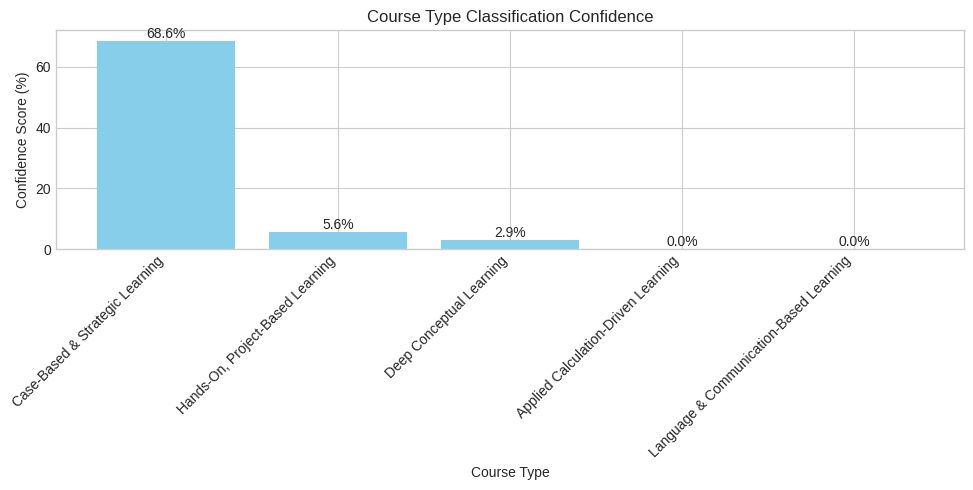

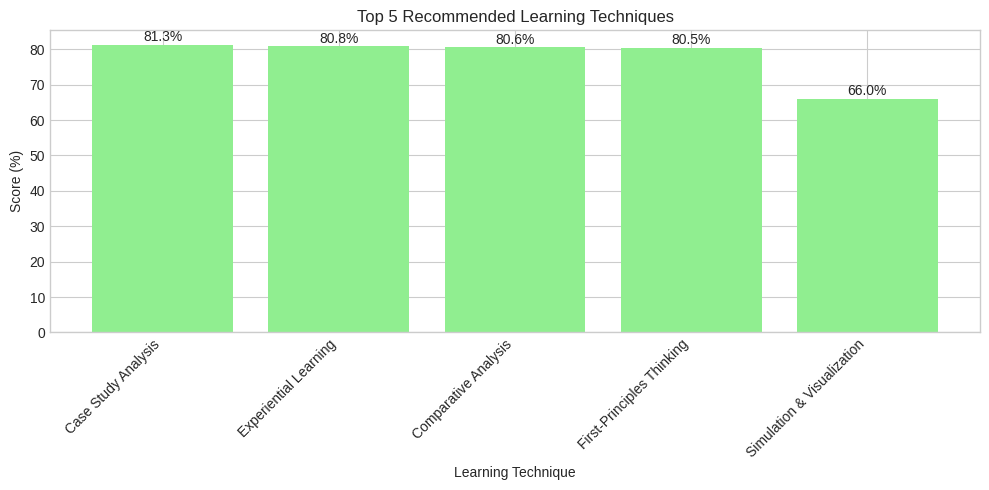


Analysis complete!


In [ ]:
# Complete Learning Style Recommender System
# Just copy and paste this into a Google Colab notebook and run it

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. COURSE TYPE CLASSIFIER
class SyllabusClassifier:
    def __init__(self):
        # Define course type descriptions
        self.course_types = {
            "Applied Calculation-Driven Learning": """Mathematical formulas equations calculations quantitative
                numerical computational statistics models algorithms mathematics physics engineering statistics
                computer science economics finance problem sets computational exercises solving equations""",

            "Deep Conceptual Learning": """Theoretical frameworks abstract concepts principles critical thinking
                theories conceptual analysis philosophy theoretical physics pure mathematics theoretical computer
                science theories concepts principles models theoretical essays""",

            "Case-Based & Strategic Learning": """Case studies real-world scenarios strategic situations
                decision-making frameworks business strategy management law medicine policy cases strategic
                analysis frameworks decision scenarios strategic plans case analyses""",

            "Language & Communication-Based Learning": """Language skills communication techniques writing
                speaking rhetoric expression literature languages journalism communication studies rhetoric
                essays presentations writing exercises communication projects""",

            "Hands-On, Project-Based Learning": """Hands-on projects building creating practical application
                learning by doing engineering design programming art music laboratory sciences projects
                practical exercises build systems project deliverables portfolios demonstrations"""
        }

        # Initialize TF-IDF vectorizer
        self.vectorizer = TfidfVectorizer(stop_words='english')
        corpus = list(self.course_types.values())
        self.course_type_vectors = self.vectorizer.fit_transform(corpus)

    def classify(self, syllabus_text):
        # Transform syllabus text
        syllabus_vector = self.vectorizer.transform([syllabus_text])

        # Calculate similarity with each course type
        similarities = {}
        for i, course_type in enumerate(self.course_types.keys()):
            similarity = cosine_similarity(self.course_type_vectors[i], syllabus_vector)[0][0]
            similarities[course_type] = similarity

        # Sort by similarity score (highest first)
        sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

        return sorted_similarities


# 2. LEARNING TECHNIQUE RECOMMENDER
class LearningStyleRecommender:
    def __init__(self):
        # Best learning techniques by course type (from our statistical analysis)
        self.technique_grades = {
            "Applied Calculation-Driven Learning": {
                "Worked Example Analysis": 93.45,
                "Simulation & Visualization": 93.06,
                "Deliberate Practice": 91.63,
                "Reverse Engineering": 90.80,
                "Iterative Writing & Editing": 63.45,
                "Case Study Analysis": 61.15
            },
            "Deep Conceptual Learning": {
                "Conceptual Mapping": 93.25,
                "Spaced Repetition": 92.46,
                "Feynman Technique": 92.42,
                "Active Recall": 92.33,
                "Project-Based Learning": 62.93,
                "Open-Ended Exploration": 60.41
            },
            "Case-Based & Strategic Learning": {
                "Case Study Analysis": 93.97,
                "Experiential Learning": 92.98,
                "Comparative Analysis": 92.60,
                "First-Principles Thinking": 92.50,
                "Simulation & Visualization": 63.42,
                "Spaced Repetition": 60.42
            },
            "Language & Communication-Based Learning": {
                "Immersive Practice": 93.14,
                "Iterative Writing & Editing": 92.70,
                "Storytelling Frameworks": 92.27,
                "Active Recall & Shadowing": 92.03,
                "Worked Example Analysis": 63.76,
                "Deliberate Practice": 61.82
            },
            "Hands-On, Project-Based Learning": {
                "Incremental Skill Building": 93.67,
                "Project-Based Learning": 92.23,
                "Learn-By-Building": 91.65,
                "Work-Along & Solving": 91.50,
                "Spaced Repetition": 64.94,
                "Conceptual Mapping": 64.78
            }
        }

    def get_techniques(self, course_type):
        # Get learning techniques for a course type, sorted by effectiveness
        techniques = self.technique_grades.get(course_type, {})
        ranked_techniques = sorted(techniques.items(), key=lambda x: x[1], reverse=True)
        return ranked_techniques


# 3. INTEGRATED SYSTEM
class LearningStyleSystem:
    def __init__(self):
        self.classifier = SyllabusClassifier()
        self.recommender = LearningStyleRecommender()

    def analyze_syllabus(self, syllabus_text):
        # Step 1: Classify the syllabus
        course_types = self.classifier.classify(syllabus_text)

        # Step 2: Get top 5 learning techniques
        results = []

        # For each course type, get its best techniques
        for course_type, score in course_types:
            techniques = self.recommender.get_techniques(course_type)

            # Add techniques to results with course type confidence score
            for technique, grade in techniques:
                # Create a combined score that factors in both course type match and technique effectiveness
                # This formula weights both the course type match and the technique grade
                combined_score = score * 0.5 + (grade/100) * 0.5

                results.append({
                    'technique': technique,
                    'expected_grade': grade,
                    'course_type': course_type,
                    'course_match': round(score * 100, 1),
                    'combined_score': round(combined_score * 100, 1)
                })

        # Sort by combined score and return top results
        sorted_results = sorted(results, key=lambda x: x['combined_score'], reverse=True)

        return {
            'course_types': course_types,
            'top_techniques': sorted_results[:5]  # Return top 5 techniques
        }

    def visualize_results(self, results):
        # Visualization for course type classification
        course_types = results['course_types']
        plt.figure(figsize=(10, 5))

        labels = [ct[0] for ct in course_types]
        values = [round(ct[1] * 100, 1) for ct in course_types]

        plt.bar(labels, values, color='skyblue')
        plt.title('Course Type Classification Confidence')
        plt.xlabel('Course Type')
        plt.ylabel('Confidence Score (%)')
        plt.xticks(rotation=45, ha='right')

        for i, v in enumerate(values):
            plt.text(i, v + 1, f"{v}%", ha='center')

        plt.tight_layout()
        plt.show()

        # Visualization for recommended techniques
        techniques = results['top_techniques']
        tech_names = [t['technique'] for t in techniques]
        tech_scores = [t['combined_score'] for t in techniques]

        plt.figure(figsize=(10, 5))
        bars = plt.bar(tech_names, tech_scores, color='lightgreen')
        plt.title('Top 5 Recommended Learning Techniques')
        plt.xlabel('Learning Technique')
        plt.ylabel('Score (%)')
        plt.xticks(rotation=45, ha='right')

        for i, v in enumerate(tech_scores):
            plt.text(i, v + 1, f"{v}%", ha='center')

        plt.tight_layout()
        plt.show()


# 4. DEMO AND USAGE SECTION
def run_demo():
    print("==== Learning Style Recommender System ====")
    print("This system analyzes a course syllabus and recommends the best learning techniques.")
    print()

    # Create the system
    system = LearningStyleSystem()

    # Example syllabi (you can replace with your own)
    example_syllabi = {
        "Calculus": """
            MATH 301: Calculus III
            Course Description: This advanced mathematics course covers multivariate calculus,
            including partial derivatives, multiple integrals, and vector calculus. Students will
            learn to solve complex mathematical problems and apply calculus techniques to real-world scenarios.

            Learning Objectives:
            1. Calculate partial derivatives and use them to find extrema of functions
            2. Evaluate multiple integrals in various coordinate systems
            3. Apply vector calculus concepts to physical problems
            4. Solve optimization problems using Lagrange multipliers

            Assessment: Weekly problem sets (40%), Two midterm exams (30%), Final exam (30%)
        """,

        "Philosophy": """
            PHIL 201: Introduction to Philosophy
            Course Description: This course introduces students to major philosophical questions and
            the works of influential philosophers. Students will explore concepts of knowledge, reality,
            ethics, and consciousness through critical reading and discussion.

            Learning Objectives:
            1. Understand major philosophical theories and their historical context
            2. Analyze complex philosophical arguments and identify their strengths and weaknesses
            3. Develop and articulate philosophical positions through writing and discussion
            4. Apply philosophical frameworks to contemporary issues

            Assessment: Reading responses (30%), Participation in discussions (20%),
            Two analytical essays (30%), Final paper (20%)
        """,

        "Business Strategy": """
            BUS 405: Strategic Management
            Course Description: This course examines how organizations formulate and implement strategy.
            Students will analyze business cases, identify strategic issues, and develop recommendations
            for organizational success in competitive environments.

            Learning Objectives:
            1. Apply strategic frameworks to analyze complex business situations
            2. Evaluate a company's competitive position and identify strategic options
            3. Develop implementation plans that address organizational challenges
            4. Make strategic recommendations supported by analysis and evidence

            Assessment: Case analyses (40%), Strategic plan project (30%), Final exam (20%),
            Class participation (10%)
        """
    }

    # Let user choose an example or enter their own
    print("Choose an option:")
    print("1. Analyze example Calculus syllabus")
    print("2. Analyze example Philosophy syllabus")
    print("3. Analyze example Business Strategy syllabus")
    print("4. Enter your own syllabus")

    choice = input("Enter your choice (1-4): ")

    if choice == '1':
        syllabus = example_syllabi["Calculus"]
    elif choice == '2':
        syllabus = example_syllabi["Philosophy"]
    elif choice == '3':
        syllabus = example_syllabi["Business Strategy"]
    elif choice == '4':
        print("\nEnter your syllabus text (press Enter twice when finished):")
        lines = []
        while True:
            line = input()
            if not line:
                break
            lines.append(line)
        syllabus = "\n".join(lines)
    else:
        print("Invalid choice. Using Calculus example.")
        syllabus = example_syllabi["Calculus"]

    # Analyze the syllabus
    print("\nAnalyzing syllabus...")
    results = system.analyze_syllabus(syllabus)

    # Print results
    print("\n==== Results ====")
    print("Course Type Classification:")
    for i, (course_type, score) in enumerate(results['course_types'], 1):
        print(f"{i}. {course_type}: {score*100:.1f}% confidence")

    print("\nTop 5 Recommended Learning Techniques:")
    for i, technique in enumerate(results['top_techniques'], 1):
        print(f"{i}. {technique['technique']} - Score: {technique['combined_score']}%")
        print(f"   Based on '{technique['course_type']}' (match: {technique['course_match']}%)")
        print(f"   Expected grade using this technique: {technique['expected_grade']}%")

    # Visualize results
    print("\nGenerating visualizations...")
    system.visualize_results(results)

    print("\nAnalysis complete!")

# Run the demo when the notebook is executed
if __name__ == "__main__":
    run_demo()

STEP 1: ANALYZING LEARNING DATA
Please upload your learning data CSV file...
The CSV must have these columns: 'Student ID', 'Session ID', 'Course Type', 'Speed to Complete Module (Hours)', 'Learning Technique', 'Grade of Module (%)'


Error loading or analyzing data: RangeError: Maximum call stack size exceeded.
Using pre-analyzed data instead...

STEP 2: SYLLABUS ANALYSIS
This system analyzes a course syllabus and recommends the best learning techniques.

Choose an option:
1. Analyze example Calculus syllabus
2. Analyze example Philosophy syllabus
3. Analyze example Business Strategy syllabus
4. Enter your own syllabus
Enter your choice (1-4): 1

Analyzing syllabus...

==== Results ====
Course Type Classification:
1. Applied Calculation-Driven Learning: 21.4% confidence
2. Case-Based & Strategic Learning: 19.9% confidence
3. Deep Conceptual Learning: 13.0% confidence
4. Hands-On, Project-Based Learning: 12.1% confidence
5. Language & Communication-Based Learning: 5.7% confidence

Top 5 Recommended Learning Techniques:
1. Worked Example Analysis - Score: 57.4%
   Based on 'Applied Calculation-Driven Learning' (match: 21.4%)
   Expected grade using this technique: 93.45%
2. Simulation & Visualization - Score: 57.2%
 

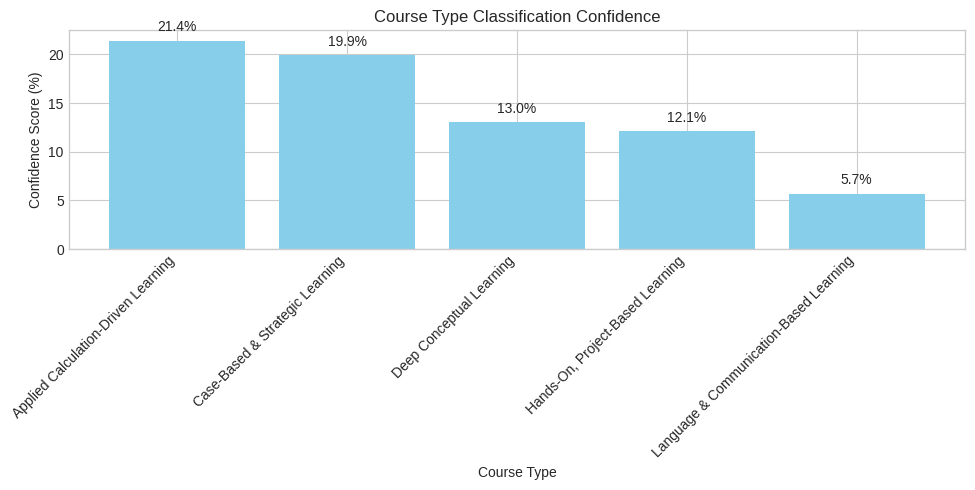

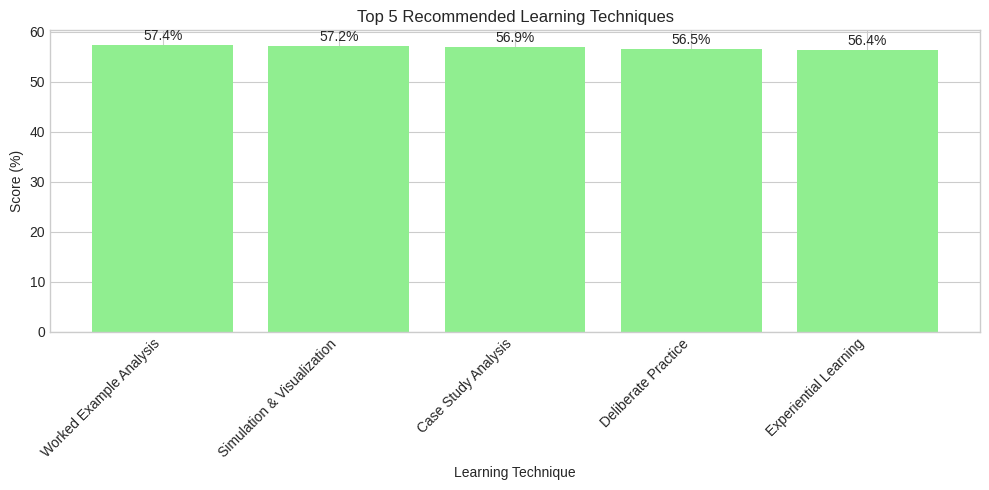


Analysis complete!


In [ ]:
# Complete Learning Style Recommender System

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files
import io

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# ======================================================================
# PART 1: STATISTICAL ANALYSIS OF LEARNING TECHNIQUES
# ======================================================================

def analyze_learning_data(data):
    """
    Analyze learning data to determine the most effective learning techniques for each course type.

    Args:
        data: DataFrame with 'Course Type', 'Learning Technique', and 'Grade of Module (%)' columns

    Returns:
        Dictionary with course types and their learning technique effectiveness
    """
    print("Analyzing learning data to determine optimal learning techniques...")

    # Check if required columns exist
    required_columns = ['Course Type', 'Learning Technique', 'Grade of Module (%)']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"Data must contain all required columns: {required_columns}")

    # Get unique course types and learning techniques
    course_types = data['Course Type'].unique()
    learning_techniques = data['Learning Technique'].unique()

    print(f"Found {len(course_types)} course types and {len(learning_techniques)} learning techniques.")

    # Analyze which learning technique yields the highest average grade for each course type
    technique_grades = {}
    best_techniques = {}

    for course_type in course_types:
        # Filter data for this course type
        course_data = data[data['Course Type'] == course_type]

        # Group by learning technique and calculate average grade
        technique_avg_grades = {}

        for technique in learning_techniques:
            technique_data = course_data[course_data['Learning Technique'] == technique]
            if len(technique_data) > 0:
                avg_grade = technique_data['Grade of Module (%)'].mean()
                technique_avg_grades[technique] = round(avg_grade, 2)

        # Store results
        technique_grades[course_type] = technique_avg_grades

        # Find the best technique for this course type
        if technique_avg_grades:
            best_technique = max(technique_avg_grades.items(), key=lambda x: x[1])[0]
            best_techniques[course_type] = best_technique

    # Display findings
    print("\nBest learning techniques for each course type:")
    for course_type, technique in best_techniques.items():
        grade = technique_grades[course_type][technique]
        print(f"- {course_type}: {technique} (Avg. Grade: {grade}%)")

    return {
        'technique_grades': technique_grades,
        'best_techniques': best_techniques
    }

def visualize_technique_effectiveness(technique_grades):
    """Visualize the effectiveness of learning techniques for each course type."""
    n_course_types = len(technique_grades)

    # Create a figure with subplots for each course type
    fig, axes = plt.subplots(n_course_types, 1, figsize=(12, 4 * n_course_types))

    if n_course_types == 1:
        axes = [axes]

    for i, (course_type, techniques) in enumerate(technique_grades.items()):
        # Sort techniques by effectiveness
        sorted_techniques = sorted(techniques.items(), key=lambda x: x[1], reverse=True)
        tech_names = [t[0] for t in sorted_techniques]
        grades = [t[1] for t in sorted_techniques]

        # Create bar colors based on grade effectiveness
        colors = ['#2E7D32' if grade > 90 else
                '#1976D2' if grade > 80 else
                '#FFA000' if grade > 70 else
                '#D32F2F' for grade in grades]

        # Create bar chart
        axes[i].bar(tech_names, grades, color=colors)
        axes[i].set_title(f"{course_type}", fontsize=12, fontweight='bold')
        axes[i].set_ylabel("Average Grade (%)")
        axes[i].set_ylim(50, 100)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].tick_params(axis='x', rotation=45)

        # Add grade annotations
        for j, grade in enumerate(grades):
            axes[i].text(j, grade + 0.5, f"{grade:.1f}%", ha='center')

    plt.tight_layout()
    plt.show()

    return fig

def load_and_analyze_data():
    """Upload CSV file, analyze it, and return the results."""
    print("Please upload your learning data CSV file...")
    print("The CSV must have these columns: 'Student ID', 'Session ID', 'Course Type', 'Speed to Complete Module (Hours)', 'Learning Technique', 'Grade of Module (%)'")

    try:
        uploaded = files.upload()

        for filename in uploaded.keys():
            # Read the data
            content = uploaded[filename]
            data = pd.read_csv(io.BytesIO(content))

            print(f"\nUploaded: {filename}")
            print(f"Data shape: {data.shape}")

            # Display column names and first few rows
            print("\nColumn names:")
            print(", ".join(data.columns))

            print("\nFirst 5 rows:")
            print(data.head())

            # Perform analysis
            results = analyze_learning_data(data)

            # Visualize effectiveness
            print("\nVisualizing learning technique effectiveness:")
            visualize_technique_effectiveness(results['technique_grades'])

            return results

        return None

    except Exception as e:
        print(f"Error loading or analyzing data: {e}")
        print("Using pre-analyzed data instead...")

        # Return pre-analyzed data as fallback
        return {
            'best_techniques': {
                "Applied Calculation-Driven Learning": "Worked Example Analysis",
                "Deep Conceptual Learning": "Conceptual Mapping",
                "Case-Based & Strategic Learning": "Case Study Analysis",
                "Language & Communication-Based Learning": "Immersive Practice",
                "Hands-On, Project-Based Learning": "Incremental Skill Building"
            },
            'technique_grades': {
                "Applied Calculation-Driven Learning": {
                    "Worked Example Analysis": 93.45,
                    "Simulation & Visualization": 93.06,
                    "Deliberate Practice": 91.63,
                    "Reverse Engineering": 90.80,
                    "Iterative Writing & Editing": 63.45,
                    "Case Study Analysis": 61.15
                },
                "Deep Conceptual Learning": {
                    "Conceptual Mapping": 93.25,
                    "Spaced Repetition": 92.46,
                    "Feynman Technique": 92.42,
                    "Active Recall": 92.33,
                    "Project-Based Learning": 62.93,
                    "Open-Ended Exploration": 60.41
                },
                "Case-Based & Strategic Learning": {
                    "Case Study Analysis": 93.97,
                    "Experiential Learning": 92.98,
                    "Comparative Analysis": 92.60,
                    "First-Principles Thinking": 92.50,
                    "Simulation & Visualization": 63.42,
                    "Spaced Repetition": 60.42
                },
                "Language & Communication-Based Learning": {
                    "Immersive Practice": 93.14,
                    "Iterative Writing & Editing": 92.70,
                    "Storytelling Frameworks": 92.27,
                    "Active Recall & Shadowing": 92.03,
                    "Worked Example Analysis": 63.76,
                    "Deliberate Practice": 61.82
                },
                "Hands-On, Project-Based Learning": {
                    "Incremental Skill Building": 93.67,
                    "Project-Based Learning": 92.23,
                    "Learn-By-Building": 91.65,
                    "Work-Along & Solving": 91.50,
                    "Spaced Repetition": 64.94,
                    "Conceptual Mapping": 64.78
                }
            }
        }

# First, perform the statistical analysis to determine the best learning techniques
print("=" * 70)
print("STEP 1: ANALYZING LEARNING DATA")
print("=" * 70)
analysis_results = load_and_analyze_data()

# ======================================================================
# PART 2: COURSE TYPE CLASSIFIER
# ======================================================================

class SyllabusClassifier:
    def __init__(self):
        """Initialize the classifier with course type descriptions."""
        # Define course type descriptions
        self.course_types = {
            "Applied Calculation-Driven Learning": """Mathematical formulas equations calculations quantitative
                numerical computational statistics models algorithms mathematics physics engineering statistics
                computer science economics finance problem sets computational exercises solving equations""",

            "Deep Conceptual Learning": """Theoretical frameworks abstract concepts principles critical thinking
                theories conceptual analysis philosophy theoretical physics pure mathematics theoretical computer
                science theories concepts principles models theoretical essays""",

            "Case-Based & Strategic Learning": """Case studies real-world scenarios strategic situations
                decision-making frameworks business strategy management law medicine policy cases strategic
                analysis frameworks decision scenarios strategic plans case analyses""",

            "Language & Communication-Based Learning": """Language skills communication techniques writing
                speaking rhetoric expression literature languages journalism communication studies rhetoric
                essays presentations writing exercises communication projects""",

            "Hands-On, Project-Based Learning": """Hands-on projects building creating practical application
                learning by doing engineering design programming art music laboratory sciences projects
                practical exercises build systems project deliverables portfolios demonstrations"""
        }

        # Initialize TF-IDF vectorizer
        self.vectorizer = TfidfVectorizer(stop_words='english')
        corpus = list(self.course_types.values())
        self.course_type_vectors = self.vectorizer.fit_transform(corpus)

    def classify(self, syllabus_text):
        """Classify a syllabus text into course types with confidence scores."""
        # Transform syllabus text
        syllabus_vector = self.vectorizer.transform([syllabus_text])

        # Calculate similarity with each course type
        similarities = {}
        for i, course_type in enumerate(self.course_types.keys()):
            similarity = cosine_similarity(self.course_type_vectors[i], syllabus_vector)[0][0]
            similarities[course_type] = similarity

        # Sort by similarity score (highest first)
        sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

        return sorted_similarities

# ======================================================================
# PART 3: LEARNING TECHNIQUE RECOMMENDER
# ======================================================================

class LearningStyleRecommender:
    def __init__(self, technique_grades):
        """
        Initialize the recommender with technique grades from analysis.

        Args:
            technique_grades: Dictionary of course types mapping to techniques and their grades
        """
        self.technique_grades = technique_grades

    def get_techniques(self, course_type):
        """Get learning techniques for a course type, sorted by effectiveness."""
        techniques = self.technique_grades.get(course_type, {})
        ranked_techniques = sorted(techniques.items(), key=lambda x: x[1], reverse=True)
        return ranked_techniques


# ======================================================================
# PART 4: INTEGRATED SYSTEM
# ======================================================================

class LearningStyleSystem:
    def __init__(self, analysis_results):
        """
        Initialize the integrated system with analysis results.

        Args:
            analysis_results: Results from the statistical analysis
        """
        self.classifier = SyllabusClassifier()
        self.recommender = LearningStyleRecommender(analysis_results['technique_grades'])

    def analyze_syllabus(self, syllabus_text):
        """Analyze a syllabus to determine the best learning techniques."""
        # Step 1: Classify the syllabus
        course_types = self.classifier.classify(syllabus_text)

        # Step 2: Get top 5 learning techniques
        results = []

        # For each course type, get its best techniques
        for course_type, score in course_types:
            techniques = self.recommender.get_techniques(course_type)

            # Add techniques to results with course type confidence score
            for technique, grade in techniques:
                # Create a combined score that factors in both course type match and technique effectiveness
                # This formula weights both the course type match and the technique grade
                combined_score = score * 0.5 + (grade/100) * 0.5

                results.append({
                    'technique': technique,
                    'expected_grade': grade,
                    'course_type': course_type,
                    'course_match': round(score * 100, 1),
                    'combined_score': round(combined_score * 100, 1)
                })

        # Sort by combined score and return top results
        sorted_results = sorted(results, key=lambda x: x['combined_score'], reverse=True)

        return {
            'course_types': course_types,
            'top_techniques': sorted_results[:5]  # Return top 5 techniques
        }

    def visualize_results(self, results):
        """Visualize the results of syllabus analysis."""
        # Visualization for course type classification
        course_types = results['course_types']
        plt.figure(figsize=(10, 5))

        labels = [ct[0] for ct in course_types]
        values = [round(ct[1] * 100, 1) for ct in course_types]

        plt.bar(labels, values, color='skyblue')
        plt.title('Course Type Classification Confidence')
        plt.xlabel('Course Type')
        plt.ylabel('Confidence Score (%)')
        plt.xticks(rotation=45, ha='right')

        for i, v in enumerate(values):
            plt.text(i, v + 1, f"{v}%", ha='center')

        plt.tight_layout()
        plt.show()

        # Visualization for recommended techniques
        techniques = results['top_techniques']
        tech_names = [t['technique'] for t in techniques]
        tech_scores = [t['combined_score'] for t in techniques]

        plt.figure(figsize=(10, 5))
        bars = plt.bar(tech_names, tech_scores, color='lightgreen')
        plt.title('Top 5 Recommended Learning Techniques')
        plt.xlabel('Learning Technique')
        plt.ylabel('Score (%)')
        plt.xticks(rotation=45, ha='right')

        for i, v in enumerate(tech_scores):
            plt.text(i, v + 1, f"{v}%", ha='center')

        plt.tight_layout()
        plt.show()


# ======================================================================
# PART 5: DEMO AND USAGE
# ======================================================================

def run_demo():
    """Run the syllabus analysis demo with the analyzed data."""
    print("\n" + "=" * 70)
    print("STEP 2: SYLLABUS ANALYSIS")
    print("=" * 70)
    print("This system analyzes a course syllabus and recommends the best learning techniques.")
    print()

    # Create the system with our analysis results
    system = LearningStyleSystem(analysis_results)

    # Example syllabi
    example_syllabi = {
        "Calculus": """
            MATH 301: Calculus III
            Course Description: This advanced mathematics course covers multivariate calculus,
            including partial derivatives, multiple integrals, and vector calculus. Students will
            learn to solve complex mathematical problems and apply calculus techniques to real-world scenarios.

            Learning Objectives:
            1. Calculate partial derivatives and use them to find extrema of functions
            2. Evaluate multiple integrals in various coordinate systems
            3. Apply vector calculus concepts to physical problems
            4. Solve optimization problems using Lagrange multipliers

            Assessment: Weekly problem sets (40%), Two midterm exams (30%), Final exam (30%)
        """,

        "Philosophy": """
            PHIL 201: Introduction to Philosophy
            Course Description: This course introduces students to major philosophical questions and
            the works of influential philosophers. Students will explore concepts of knowledge, reality,
            ethics, and consciousness through critical reading and discussion.

            Learning Objectives:
            1. Understand major philosophical theories and their historical context
            2. Analyze complex philosophical arguments and identify their strengths and weaknesses
            3. Develop and articulate philosophical positions through writing and discussion
            4. Apply philosophical frameworks to contemporary issues

            Assessment: Reading responses (30%), Participation in discussions (20%),
            Two analytical essays (30%), Final paper (20%)
        """,

        "Business Strategy": """
            BUS 405: Strategic Management
            Course Description: This course examines how organizations formulate and implement strategy.
            Students will analyze business cases, identify strategic issues, and develop recommendations
            for organizational success in competitive environments.

            Learning Objectives:
            1. Apply strategic frameworks to analyze complex business situations
            2. Evaluate a company's competitive position and identify strategic options
            3. Develop implementation plans that address organizational challenges
            4. Make strategic recommendations supported by analysis and evidence

            Assessment: Case analyses (40%), Strategic plan project (30%), Final exam (20%),
            Class participation (10%)
        """
    }

    # Let user choose an example or enter their own
    print("Choose an option:")
    print("1. Analyze example Calculus syllabus")
    print("2. Analyze example Philosophy syllabus")
    print("3. Analyze example Business Strategy syllabus")
    print("4. Enter your own syllabus")

    choice = input("Enter your choice (1-4): ")

    if choice == '1':
        syllabus = example_syllabi["Calculus"]
    elif choice == '2':
        syllabus = example_syllabi["Philosophy"]
    elif choice == '3':
        syllabus = example_syllabi["Business Strategy"]
    elif choice == '4':
        print("\nEnter your syllabus text (press Enter twice when finished):")
        lines = []
        while True:
            line = input()
            if not line:
                break
            lines.append(line)
        syllabus = "\n".join(lines)
    else:
        print("Invalid choice. Using Calculus example.")
        syllabus = example_syllabi["Calculus"]

    # Analyze the syllabus
    print("\nAnalyzing syllabus...")
    results = system.analyze_syllabus(syllabus)

    # Print results
    print("\n==== Results ====")
    print("Course Type Classification:")
    for i, (course_type, score) in enumerate(results['course_types'], 1):
        print(f"{i}. {course_type}: {score*100:.1f}% confidence")

    print("\nTop 5 Recommended Learning Techniques:")
    for i, technique in enumerate(results['top_techniques'], 1):
        print(f"{i}. {technique['technique']} - Score: {technique['combined_score']}%")
        print(f"   Based on '{technique['course_type']}' (match: {technique['course_match']}%)")
        print(f"   Expected grade using this technique: {technique['expected_grade']}%")

    # Visualize results
    print("\nGenerating visualizations...")
    system.visualize_results(results)

    print("\nAnalysis complete!")

# Run the demo when the notebook is executed
if __name__ == "__main__":
    run_demo()